In [27]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
file_list=glob.glob('n32768d1024/*.out')
columns=["nodes","threads","scatter time","gather time", "cal time", "total time", "message size"]
result_df=pd.DataFrame(columns=columns)

In [29]:
for file in file_list:
    df_row={}
    file_name=file
    file_name=file_name.split('/')[1]
    file_name=file_name.split('.')[0]
    file_name=file_name.replace('n','')
    file_name=file_name.replace('t','')
    file_name=file_name.split('_')
    df_row["nodes"]=int(file_name[0])
    df_row["threads"]=int(file_name[1])
    scatter_time=[]
    gather_time=[]
    cal_time=[]
    total_time=[]
    with open(file) as f:
        for line in f:
            if "Scatter" in line:
                scatter_time.append(float(line.split(' ')[-1]))
            if "Gather" in line:
                gather_time.append(float(line.split(' ')[-1]))
            if "Calculation" in line:
                cal_time.append(float(line.split(' ')[-1]))
            if "Total time" in line:
                total_time.append(float(line.split(' ')[-1]))
            if "Total message size" in line:
                df_row["message size"]=float(line.split(':')[1].replace('GB',''))
    df_row["scatter time"]=max(scatter_time)
    df_row["gather time"]=max(gather_time)
    df_row["cal time"]=max(cal_time)
    df_row["total time"]=max(total_time)
    result_df=result_df.append(df_row,ignore_index=True)
    

/tmp/ipykernel_3344262/276773883.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df=result_df.append(df_row,ignore_index=True)
/tmp/ipykernel_3344262/276773883.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df=result_df.append(df_row,ignore_index=True)
/tmp/ipykernel_3344262/276773883.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df=result_df.append(df_row,ignore_index=True)
/tmp/ipykernel_3344262/276773883.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df=result_df.append(df_row,ignore_index=True)
/tmp/ipykernel_3344262/276773883.py:31: FutureWarning: The frame.append method is deprec

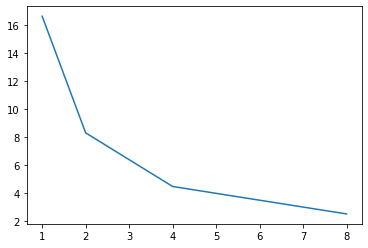

In [30]:
tempdf=result_df[(result_df["threads"]==1)]
tempdf=tempdf.sort_values(by=['nodes'])
xdata=tempdf["nodes"]
ydata=tempdf["total time"]
plt.plot(xdata,ydata,label="1 thread")